In [1]:
# Notebook from DLI Quantum Computing course by Antonio Macaluso
# https://github.com/DeepLearningItalia/Quantum_Computing
# June 2021

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, BasicAer,IBMQ
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_state_qsphere
import math

n_qubits = 1

# Create a quantum circuit with n qubits
circuit = QuantumCircuit(n_qubits)  

# vector |0>
initial_state = [1, 0]   

# Apply initialisation operation to the 0th qubit
circuit.initialize(initial_state, 0) 

# Let's view our circuit
circuit.draw()

┌─────────────────┐
q_0: ┤ initialize(1,0) ├
     └─────────────────┘

In [8]:
from qiskit.visualization import plot_bloch_multivector

In [2]:
# choose how to simulate the circuit:
# with statevector
backend = Aer.get_backend('statevector_simulator') 

# Create a quantum circuit with n qubits
circuit = QuantumCircuit(n_qubits)  

# vector |0>
initial_state = [1,0]   

# Apply initialisation operation to the 0th qubit
circuit.initialize(initial_state, 0) 

# Do the simulation, returning the result
result = execute(circuit, backend).result().get_statevector()

print(result)

[1.+0.j 0.+0.j]


In [3]:
# choose how to simulate the circuit:
# with qasm
# backend = BasicAer.get_backend('qasm_simulator')

# run quantum circuit
# result = execute(circuit, backend, shots=8192).result()

# Measurement operation for all qubits
# circuit.measure_all()
# circuit.draw()

No classical registers in circuit "circuit-4", counts will be empty.


┌─────────────────┐ ░ ┌─┐
   q_0: ┤ initialize(1,0) ├─░─┤M├
        └─────────────────┘ ░ └╥┘
meas: 1/═══════════════════════╩═
                               0

In [3]:
# Another quantum state

# Custom Initialisation
initial_state = [1/math.sqrt(2), 1j/math.sqrt(2)]  # Define state |q>

qc = QuantumCircuit(1) # quantum circuit
qc.initialize(initial_state, 0) # Initialise the 0th qubit in the state `initial_state`

state = execute(qc, backend).result().get_statevector() # Execute the circuit
print(state) # Print the result

[0.70710678+0.j         0.        +0.70710678j]


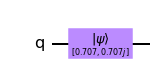

In [4]:
qc.draw('mpl')

In [ ]:
# run quantum circuit
# results = execute(qc, backend).result().get_counts()

# print(results)

# plot_histogram(results)

In [6]:
# Let's do an X-gate on a |0> qubit
qc = QuantumCircuit(1)
qc.x(0)
qc.draw('mpl')

state = execute(qc, backend).result().get_statevector() # Execute the circuit
print(state) # Print the result

[0.+0.j 1.+0.j]


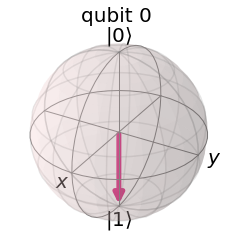

In [9]:
backend = Aer.get_backend('statevector_simulator')

out = execute(qc,backend).result().get_statevector()

plot_bloch_multivector(out)

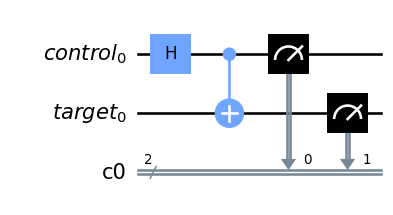

In [10]:
## Bell state

# initialisation
control = QuantumRegister(1, name='control')
target = QuantumRegister(1, name='target')
bits = ClassicalRegister(2)

qc = QuantumCircuit(control, target, bits)

# Apply H-gate to the first qubit:
qc.h(control)

# Apply a CNOT:
qc.cx(control_qubit=control, target_qubit =target)

final_state = execute(qc, backend).result().get_statevector()

qc.measure(qubit=control, cbit=bits[0])
qc.measure(qubit=target, cbit=bits[1])

qc.draw('mpl', scale=1.3)# , filename='bell_circuit.png')

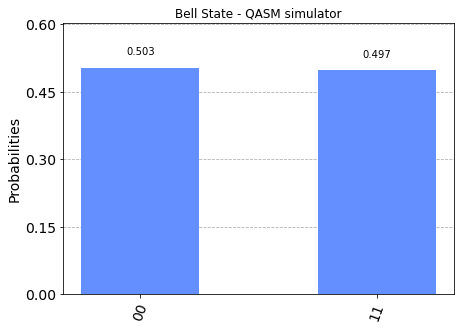

In [11]:
# QASM 
backend = BasicAer.get_backend('qasm_simulator')

shots = 8192

result_qasm = execute(qc, backend, shots=shots).result().get_counts()
plot_histogram(result_qasm, title="Bell State - QASM simulator") #.savefig('QASM_bell.png')

In [27]:
# Save account from disk
from qiskit import IBMQ
IBMQ.save_account('8b32e300bd36ac48fdeeb6e29e6a2eb0253fb439f0ac6897c9fc845dff3d264def8341853ee5dda62b7993035a5730d86404b86a71d0f9ec91b0d9fc44f7a37f',overwrite=True)
# IBMQ.save_account('api_token', overwrite=True)

In [ ]:
# Execution on real device
IBMQ.load_account() # Load account from disk
IBMQ.providers() # List all available providers

In [ ]:
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()
device = provider.get_backend('ibmq_santiago')

In [ ]:
result = execute(qc, device, shots=shots).result().get_counts()

In [ ]:
plot_histogram(result, title="Bell State - IBMQ santiago")